In [1]:
import numpy as np 
import pandas as pd 
from pathlib import Path

from fastai import *
from fastai.vision import *

import os

In [2]:
data_path = Path("../input/cell_images/cell_images/")

In [3]:
data_path

PosixPath('../input/cell_images/cell_images')

Do some data augmentation

In [4]:
transforms = get_transforms(do_flip = True, 
                            flip_vert = True, 
                            max_rotate = 10.0, 
                            max_zoom = 1.1, 
                            max_lighting = 0.2, 
                            max_warp = 0.2, 
                            p_affine = 0.75, 
                            p_lighting = 0.75)

Get data from folder and apply transformations to augment and normalize the data.
Split 20% of the data to validation.

In [5]:
data = ImageDataBunch.from_folder(data_path,
                                  train = '.',
                                  valid_pct = 0.2,
                                  size = 224,
                                  bs = 16,
                                  ds_tfms = transforms
                                 ).normalize(imagenet_stats)

In [6]:
data.classes

['Parasitized', 'Uninfected']

Vizualize some of the images

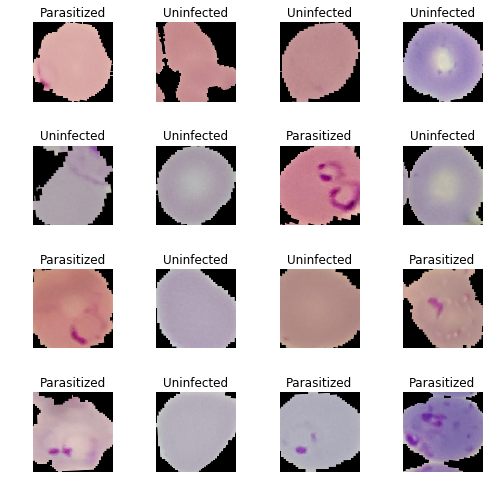

In [7]:
data.show_batch(rows = 4, figsize = (7, 7))

* Create a Learner Object with data, DenseNet model and the metrics

In [8]:
learn = cnn_learner(data, models.densenet161 , metrics = [accuracy, error_rate], model_dir = '/tmp/model/')

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /tmp/.torch/models/densenet161-8d451a50.pth
115730790it [00:05, 19979171.53it/s]


Find a good value for the learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


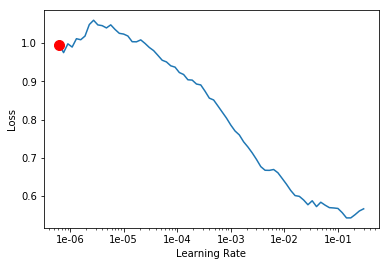

In [9]:
learn.lr_find()

learn.recorder.plot(suggestion = True)

Train the model, at this moment the model is frozen

In [10]:
min_grad_lr = learn.recorder.min_grad_lr

learn.fit_one_cycle(20, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.938416,0.747577,0.551624,0.448376,06:23
1,0.922258,0.702284,0.581746,0.418254,06:05


In [11]:
learn.save('first-phase')

Now unfreeze the last convolutional layer and find an appropriate learning rate to train again

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-06


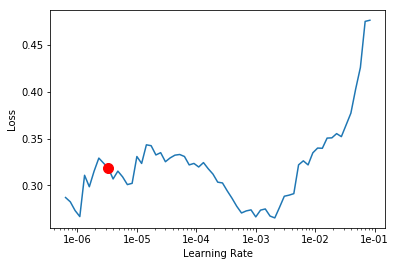

In [12]:
learn.unfreeze()

learn.lr_find()

learn.recorder.plot(suggestion = True)

In [13]:
min_grad_lr = learn.recorder.min_grad_lr

learn.fit_one_cycle(30, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.294884,0.191973,0.925422,0.074578,07:08
1,0.221954,0.163088,0.939938,0.060062,07:07
2,0.248587,0.147413,0.946652,0.053348,07:08


In [14]:
learn.save('second-phase')

Plot the loss

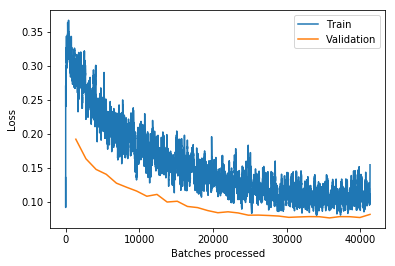

In [15]:
learn.recorder.plot_losses()

Plot accuracy and error rate

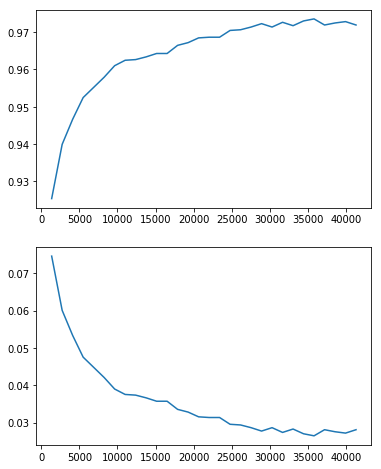

In [16]:
learn.recorder.plot_metrics()

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

Vizualize some images the model predicted wrong

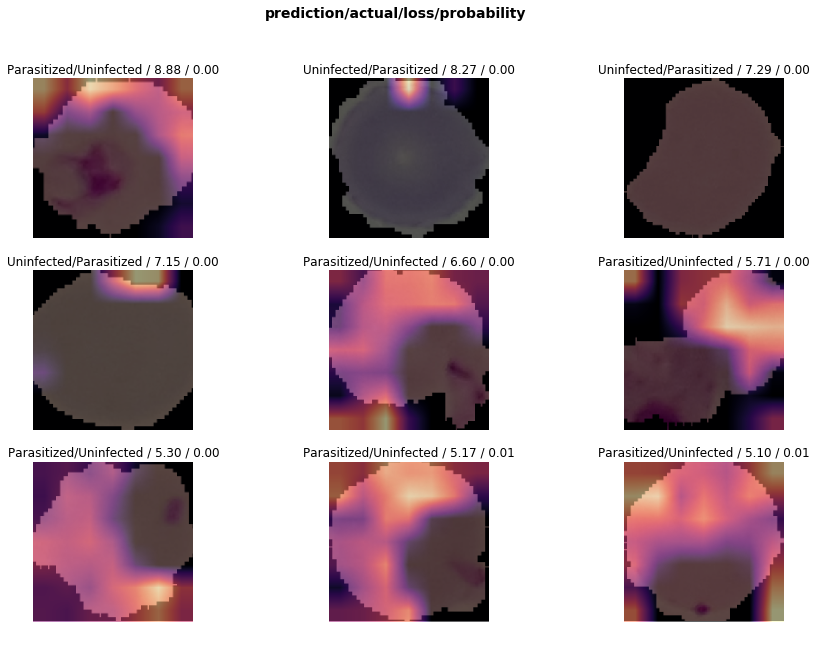

In [18]:
interp.plot_top_losses(9, figsize = (15, 10))

Plot the confusion matrix

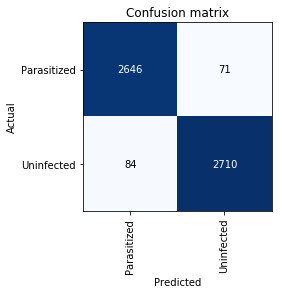

In [19]:
interp.plot_confusion_matrix()